## Prédiction du désabonnement des client d'une société de téléphonie Mobile

In [234]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/844/1*MyKDLRda6yHGR_8kgVvckg.png')


<span style="color:green"> Dictionnaire des variables </span>




**Churn**: La colonne Churn indique si le client est parti ou non au cours du dernier mois.

**gender**:	Le sexe du client : Homme, Femme

**SeniorCitizen**: Indique si le client a 65 ans ou plus : Oui, Non

**Partner**: Indique si le client a un partenaire : Oui, Non

**Dependents**: Indique si le client vit avec des personnes à charge : Oui, Non.

**tenure**: Indique le nombre total de mois pendant lesquels le client est resté abonné aux services de l'entreprise

**PhoneService**: Indique si le client est abonné au service de téléphonie résidentielle auprès de l'entreprise : Oui, Non

**InternetService**: Indique si le client souscrit au service Internet auprès de l'entreprise : Non, DSL, Fibre Optique, Câble.

**OnlineSecurity**: Indique si le client souscrit à un service supplémentaire de sécurité en ligne fourni par l'entreprise : Oui, Non

**Contract**: Indique le type de contrat actuel du client : mensuel, un an, deux ans.

**PaperlessBilling**: Indique si le client a choisi la facturation dématérialisée : Oui, Non

**PaymentMethod**: Indique comment le client règle sa facture : Chèque électronique, Chèque postal, Retrait bancaire, Carte de crédit

**MonthlyCharges**: Indique le montant mensuel en dollars$ des charges du client pour tous ses services de l’entreprise.

**TotalCharges**: Indique les charges totales en dollars$ du client, calculées jusqu’à présent.


# <span style="color:green"> Analyse Exploratoire des données </span>



<span style="color:green"> Import des données et des bibliothèques </span>



In [235]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings

from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import mlflow

from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

data = pd.read_csv('data.csv', sep=';', decimal='.', encoding='ISO-8859-1')

data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,DSL,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,DSL,Yes,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,DSL,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,DSL,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,Fiber optic,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [236]:
print(data["PaymentMethod"].unique())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


<span style="color:green"> Modification du type de certaines variables </span>

In [237]:

data[["MonthlyCharges","TotalCharges","tenure"]]=data[["MonthlyCharges","TotalCharges","tenure"]].replace(' ', np.nan).astype(float)
#data['SeniorCitizen']=data['SeniorCitizen'].astype(object)
data['SeniorCitizen']=data['SeniorCitizen'].map({0: "No", 1: "Yes"})
data.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure              float64
PhoneService         object
InternetService      object
OnlineSecurity       object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

<span style="color:green"> Statistiques descriptives des variables continues </span>

In [238]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000



<span style="color:green"> pourcentage des valeurs manquantes par colonnes </span>


In [239]:
data.isna().mean().mul(100).round(2)

gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
InternetService     0.00
OnlineSecurity      0.00
Contract            0.00
PaperlessBilling    0.00
PaymentMethod       0.00
MonthlyCharges      0.00
TotalCharges        0.16
Churn               0.00
dtype: float64

**Commentaire**: On constate que la variable TotalCharges compte 16% de valeurs manquantes

<span style="color:green"> Analyses univariées </span>

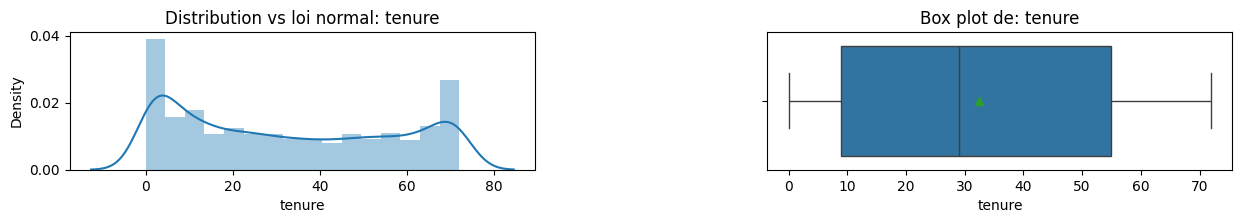

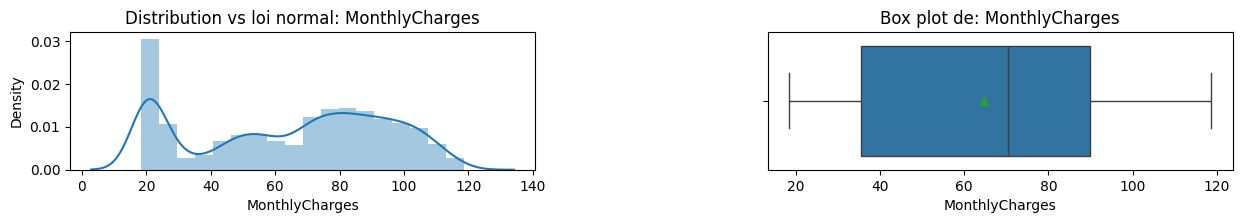

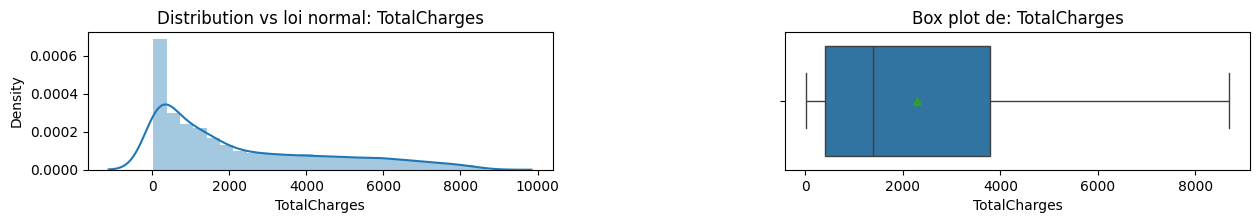

In [240]:
# Analyses univariéés Variables quantitatives

plt.rcParams["figure.figsize"] = [15,5]
grid = plt.GridSpec(2,2 , wspace=0.5, hspace=0.8)
for col in data.select_dtypes( include = ['float', 'int']).columns.to_list():
    plt.figure()
    ax0 = plt.subplot(grid[0, 0:1])
    ax0= sns.distplot(data[col], kde =True)
    ax0.set_title("Distribution vs loi normal: {}" .format(col), fontsize = 12)
    ax1 = plt.subplot(grid[0, 1:])
    ax1= sns.boxplot(data = data,  x = data[col], showfliers =False, showmeans =True)
    ax1.set_title("Box plot de: {}" .format(col), fontsize = 12)
warnings.filterwarnings("ignore")


**Commentaire**: On constate que nos variables continues ne sont pas distribuées suivant une loi normale. La distribution de la variable TotalCharges est particulièrement asymétrique. Je vais régler ce problème d'asymétrie en appliquant la fonction racine carrée à cette variable.

<Axes: xlabel='Churn', ylabel='count'>

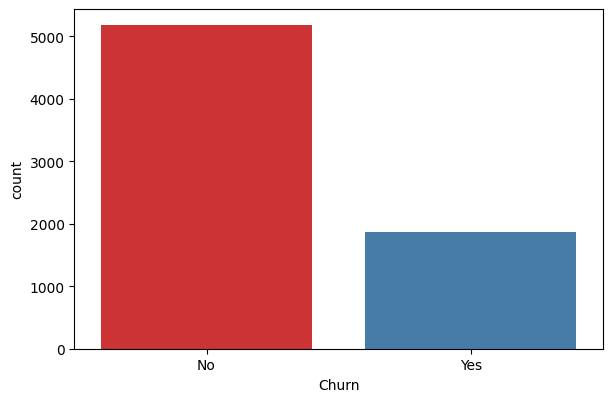

In [241]:
# Analyse univariée des variables qualitatives

plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'Churn', palette = 'Set1', data = data)


**Commentaire**: On constate que près de 2000 personnes sur les 7043 clients se sont désabonnées, ce qui n'est pas un chiffre négligeable et constitue un gros manque à gagner pour la société. L'effectif des deux classes reste qu'à même déséquilibré avec près de 3 fois plus de personnes qui sont restées abonnées que de personnes qui ce sont désabonnées.

<Axes: xlabel='InternetService', ylabel='count'>

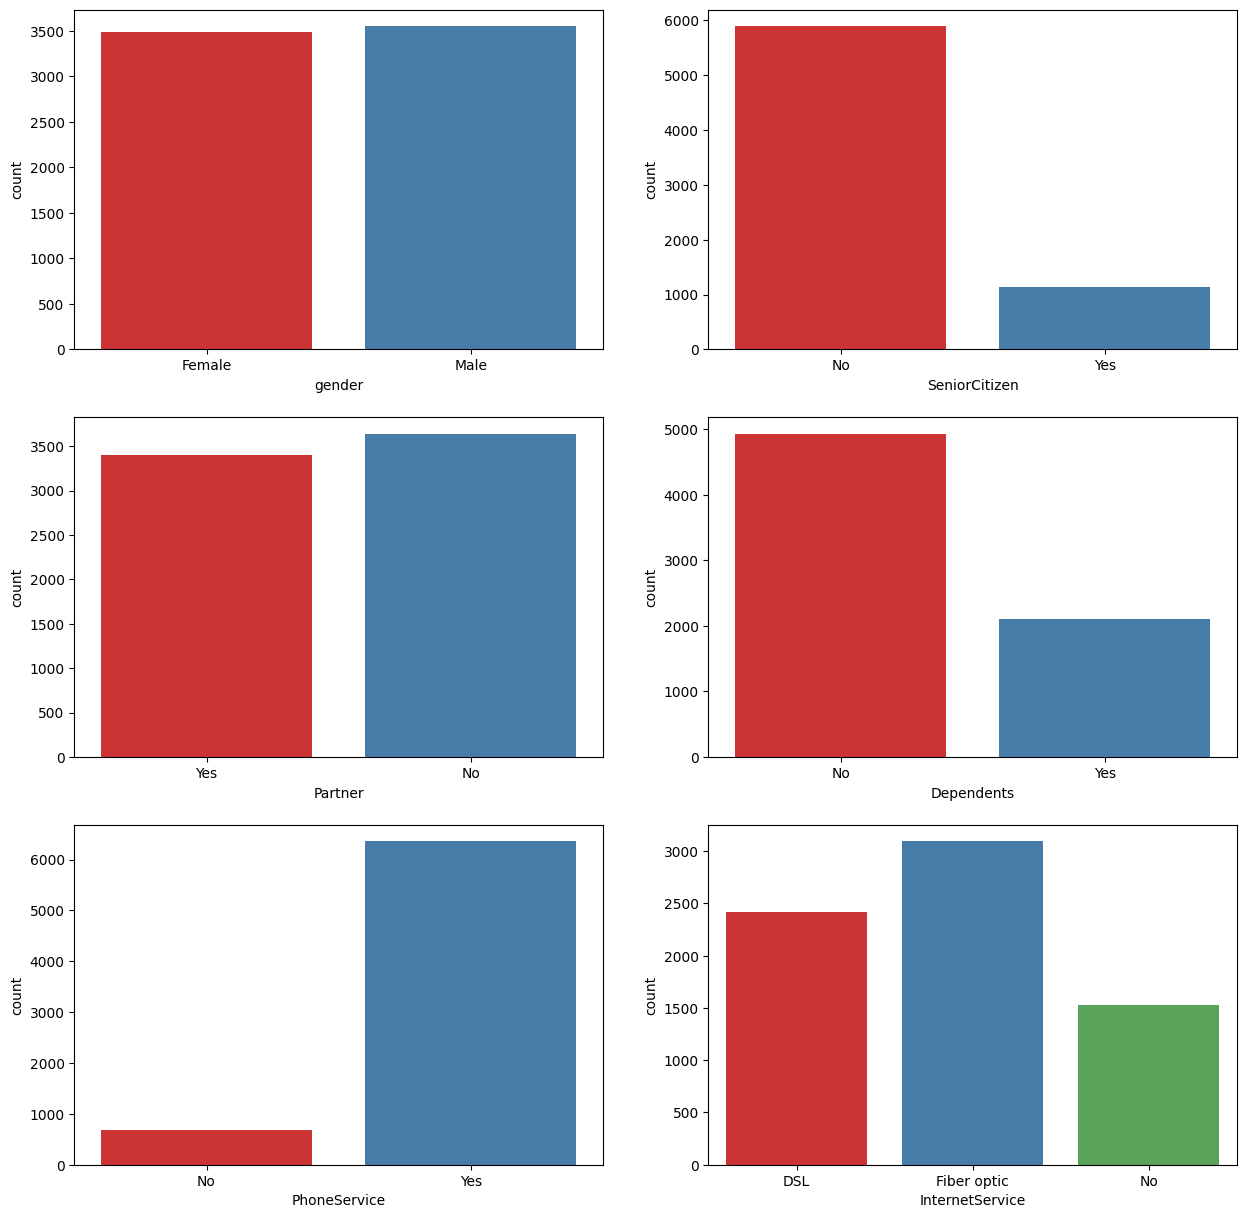

In [242]:

plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'gender', palette = 'Set1', data = data)

plt.subplot(3,2,2)
sns.countplot(x = 'SeniorCitizen', palette = 'Set1', data = data)

plt.subplot(3,2,3)
sns.countplot(x = 'Partner', palette = 'Set1', data = data)

plt.subplot(3,2,4)
sns.countplot(x = 'Dependents', palette = 'Set1', data = data)

plt.subplot(3,2,5)
sns.countplot(x = 'PhoneService', palette = 'Set1', data = data)

plt.subplot(3,2,6)
sns.countplot(x = 'InternetService', palette = 'Set1', data = data)


**Commentaires**: Le nombre d'hommes et de femmes est assez équilibré. Le nombre de personnes ayant un partenaire et ceux n'en n'ayant pas est aussi sensiblement égal. La grande majorité des individus ne sont pas d'âge Senior, n'ont pas de personnes à leur charge et sont abonnés au service téléphonique. La grande majorité des gens ont un service internet, la plupart ont un forfait fibre optique.

<Axes: xlabel='PaperlessBilling', ylabel='count'>

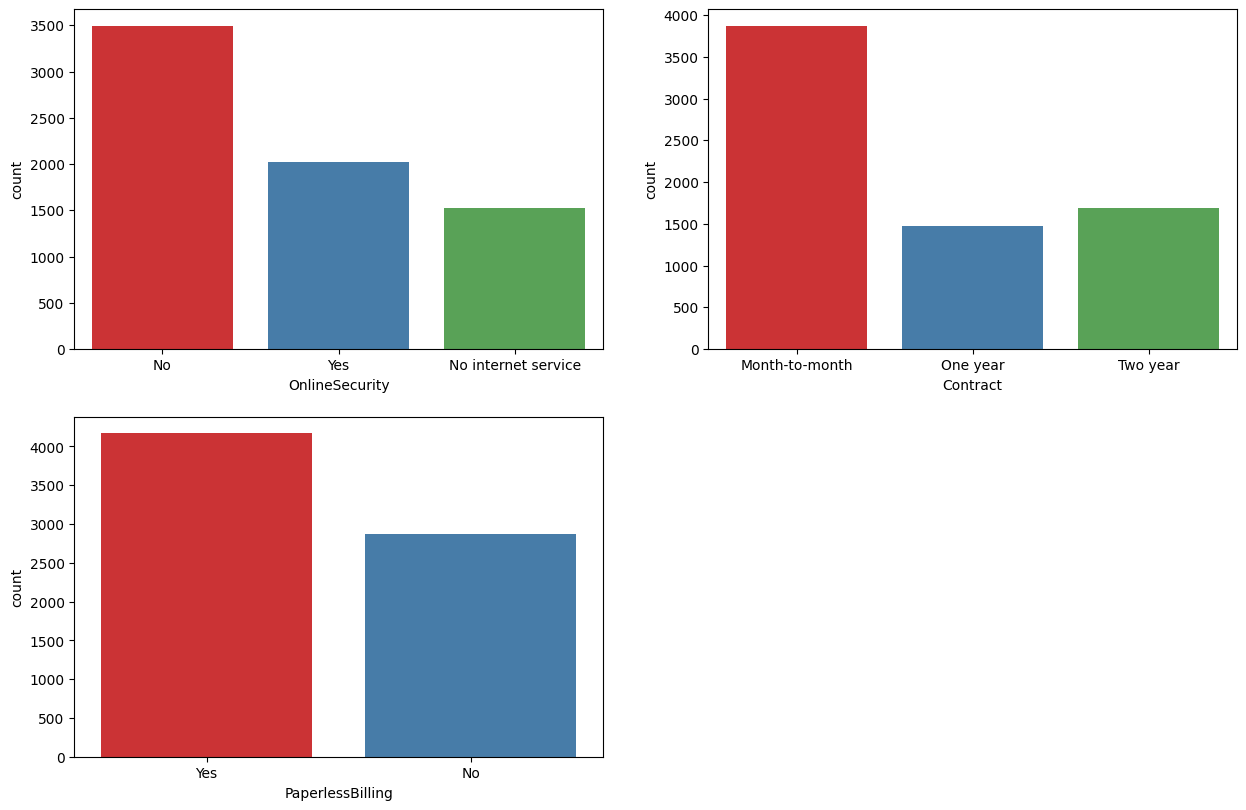

In [243]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'OnlineSecurity', palette = 'Set1', data = data)

plt.subplot(3,2,2)
sns.countplot(x = 'Contract', palette = 'Set1', data = data)

plt.subplot(3,2,3)
sns.countplot(x = 'PaperlessBilling', palette = 'Set1', data = data)


**Commentaires**: Plus de la moitié des contracts d'abonnement sont mensuels. Plus de ma moitié des gens n'ont pas souscrit à un service de sécurité en ligne et une grande majorité des clients ont choisi une facturation dématérialisée (PaperlessBilling)

<Axes: xlabel='PaymentMethod', ylabel='count'>

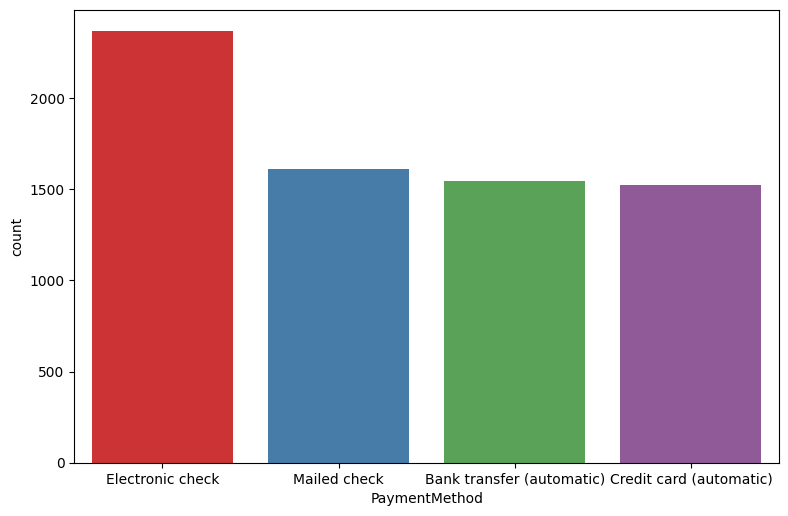

In [244]:
plt.figure(figsize = (20,20))
plt.subplot(3,2,4)
sns.countplot(x = 'PaymentMethod', palette = 'Set1', data = data)

**Commentaires**: Le paiement électronique est le plus choisi comme méthode de paiement.

<span style="color:green"> Analyses bivariées </span>

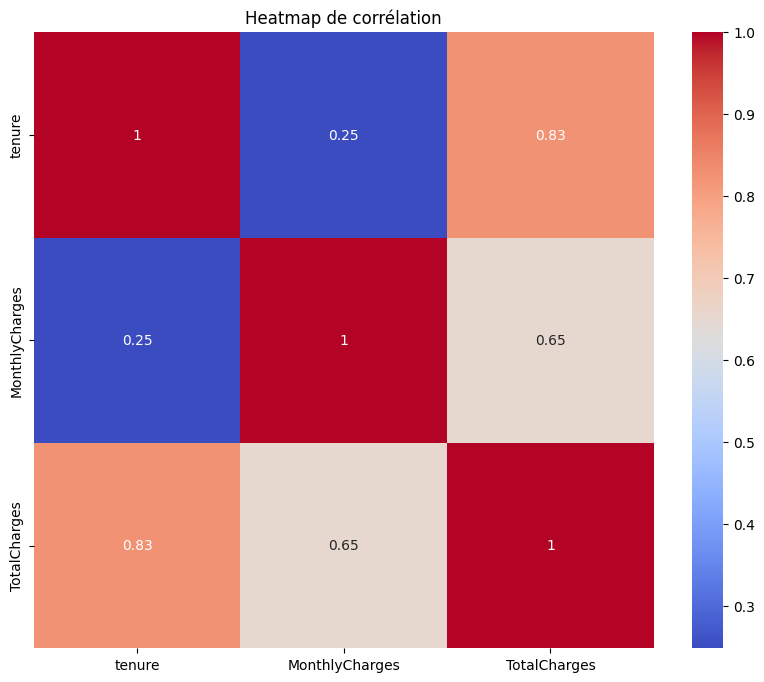

In [245]:
# Analyses bivariées des variables quantitatives

# Matrice de corrélation linéaire entre les variables continues

df = data.select_dtypes(include=["int64", "float64"])
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
plt.title('Heatmap de corrélation')
plt.show()


**Commentaires**: On constate une forte corrélation linéaire entre la variable TotalCharges et Tenure. Ce qui est assez intuitif compte tenu du fait que plus le client reste abonné au service, plus ses charges totales seront élevé.

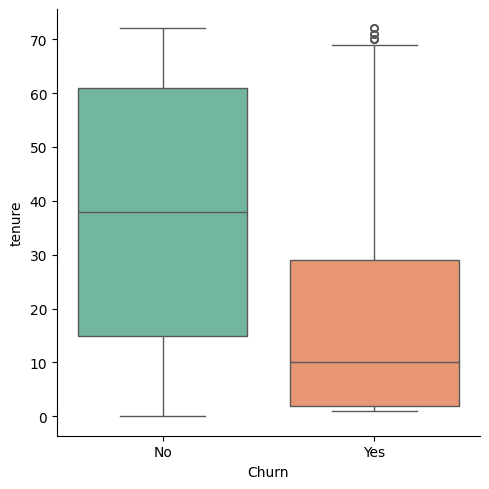

In [246]:
# Distribution des variables continues en fonctions de la variables de désabonnement.

sns.catplot(x = 'Churn', y="tenure", kind="box", data = data, palette="Set2")


**Commentaires**: On observe une différence significative de la moyenne du nombre total de mois pendant lesquels le client est resté abonné au service de l'entreprise (tenure) au sein des deux groupes (churn et non-churn). Le nombre total de mois pendant lesquels le client est resté abonné aux services de l'entreprise dans le groupe des non-churn est bien plus important que dans celui des churn. On peut donc penser que le fait de rester longtemps abonné augmente avec la probabilité de ne pas se désabonner. On dira ainsi qu’il y'a une liaison entre les variables **churn** et **tenure**.

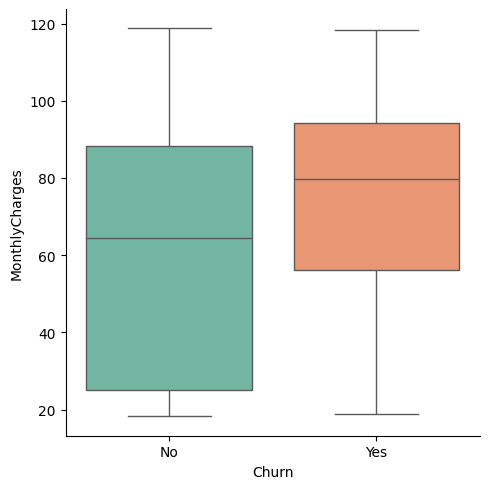

In [247]:
sns.catplot(x = 'Churn', y="MonthlyCharges", kind="box", data = data, palette="Set2")

**Commentaires**: On observe également une différence significative de la moyenne des charges mensuelles au sein des deux groupes (churn et non-churn). La moyenne des charges mensuelles dans le groupe des churns est bien plus importante que dans celui des churns. On peut donc penser que plus les charges mensuelles augmentent, plus la probabilité que le client se désabonne est grande. On dira ainsi qu’il y’a une dépendance ou liaison entre les variables churn et MonthlyCharges.

<Axes: xlabel='InternetService', ylabel='count'>

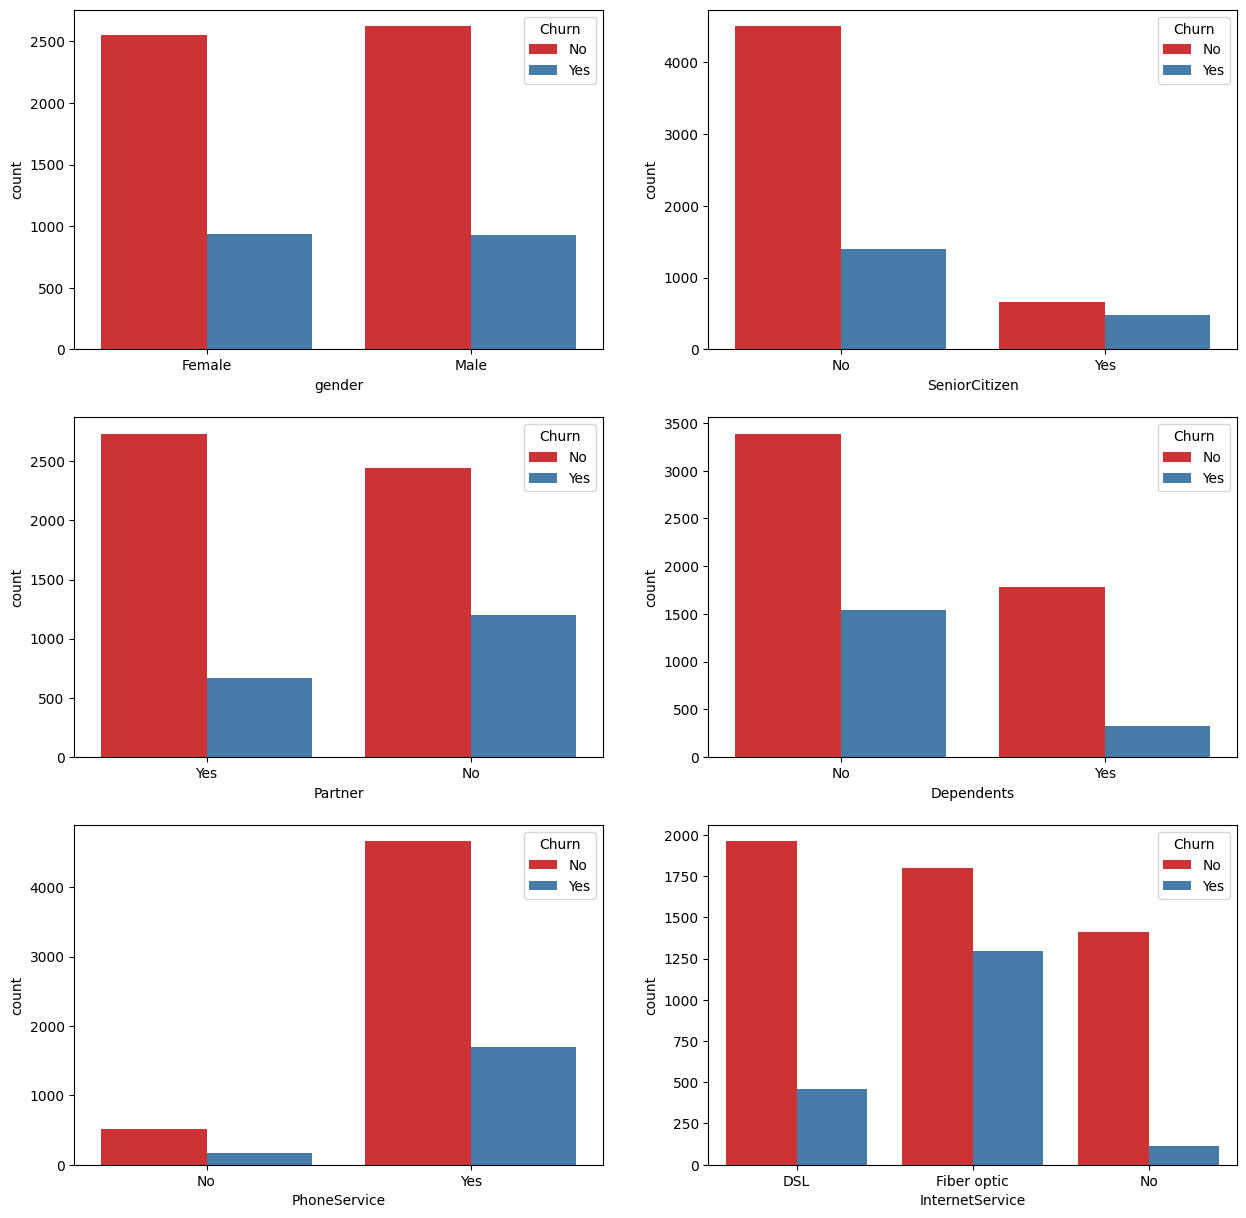

In [248]:
# Analyse bivariée des variables qualitatives

plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'gender', hue = 'Churn', palette = 'Set1', data = data)

plt.subplot(3,2,2)
sns.countplot(x = 'SeniorCitizen',hue = 'Churn', palette = 'Set1', data = data)

plt.subplot(3,2,3)
sns.countplot(x = 'Partner', hue = 'Churn', palette = 'Set1', data = data)

plt.subplot(3,2,4)
sns.countplot(x = 'Dependents', hue = 'Churn', palette = 'Set1', data = data)

plt.subplot(3,2,5)
sns.countplot(x = 'PhoneService', hue = 'Churn',palette = 'Set1', data = data)

plt.subplot(3,2,6)
sns.countplot(x = 'InternetService',hue = 'Churn', palette = 'Set1', data = data)


<Axes: xlabel='PaperlessBilling', ylabel='count'>

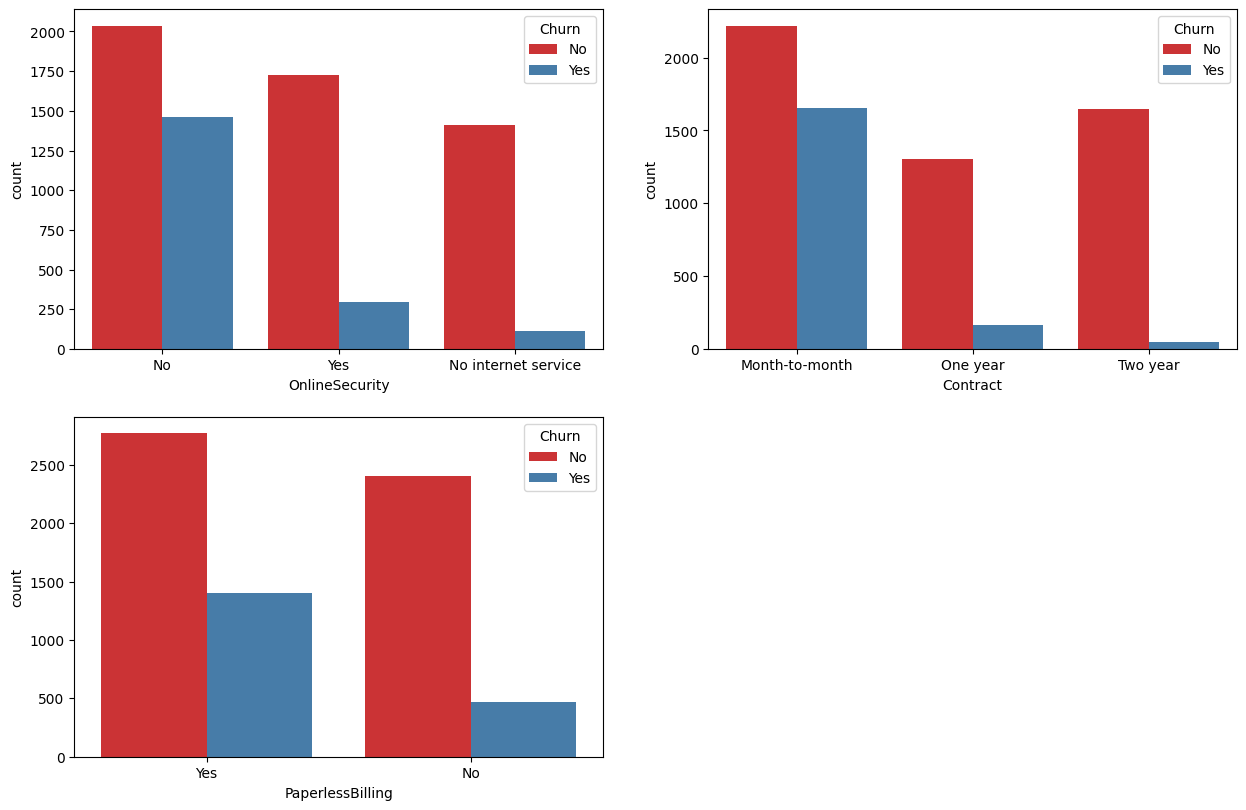

In [249]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'OnlineSecurity',hue = 'Churn', palette = 'Set1', data = data)

plt.subplot(3,2,2)
sns.countplot(x = 'Contract',hue = 'Churn', palette = 'Set1', data = data)

plt.subplot(3,2,3)
sns.countplot(x = 'PaperlessBilling',hue = 'Churn', palette = 'Set1', data = data)


<Axes: xlabel='PaymentMethod', ylabel='count'>

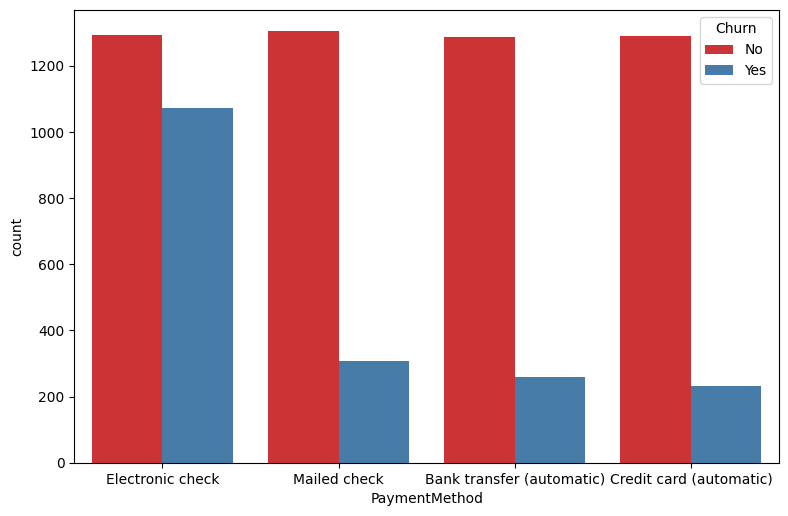

In [250]:
plt.figure(figsize = (20,20))
plt.subplot(3,2,4)
sns.countplot(x = 'PaymentMethod',hue = 'Churn', palette = 'Set1', data = data)

<span style="color:green"> Conversion des variables dummies en plusieurs variables binaires </span>


In [251]:
# Conversion des variables dummies (variables catégorielles avec plus de deux modalités) en variables binaires
# en évitant le piège de variable factice (multicolinéarité)

data_dummies=data[['InternetService','Contract','PaymentMethod']]
data_dummies_ = pd.get_dummies(data_dummies, drop_first=True)
data_dummies_.head

<bound method NDFrame.head of       InternetService_Fiber optic  InternetService_No  Contract_One year  \
0                           False               False              False   
1                           False               False               True   
2                           False               False              False   
3                           False               False               True   
4                            True               False              False   
...                           ...                 ...                ...   
7038                        False               False               True   
7039                         True               False               True   
7040                        False               False              False   
7041                         True               False              False   
7042                         True               False              False   

      Contract_Two year  PaymentMethod_Credit card (autom

<span style="color:green"> Recupération du Dataframe finale </span>


In [252]:
final_data_=data.drop(columns=['InternetService','Contract','PaymentMethod'])
final_data=pd.concat([final_data_,data_dummies_],axis=1)
liste_dummies=['InternetService_Fiber optic','InternetService_No','Contract_One year','Contract_Two year',
            'PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check',
            ]

final_data[liste_dummies]=final_data[liste_dummies].astype('object')
final_data.dtypes


gender                                    object
SeniorCitizen                             object
Partner                                   object
Dependents                                object
tenure                                   float64
PhoneService                              object
OnlineSecurity                            object
PaperlessBilling                          object
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                     object
InternetService_Fiber optic               object
InternetService_No                        object
Contract_One year                         object
Contract_Two year                         object
PaymentMethod_Credit card (automatic)     object
PaymentMethod_Electronic check            object
PaymentMethod_Mailed check                object
dtype: object


<span style="color:green"> Réechantillonnage pour rééquilibrer les classes </span>


In [253]:

#pip install imblearn
seed = 4321

from imblearn.over_sampling import RandomOverSampler

# Target du modèle
Y = final_data['Churn'].map({'No': 0, 'Yes': 1})

#  Features du modèle
X = final_data.drop(['Churn'], axis=1)

# Application de la fonction racine carrée à la variable TotalCharges
X['TotalCharges']=np.sqrt(X['TotalCharges'])

ros = RandomOverSampler(random_state=seed)

X, Y = ros.fit_resample(X, Y)

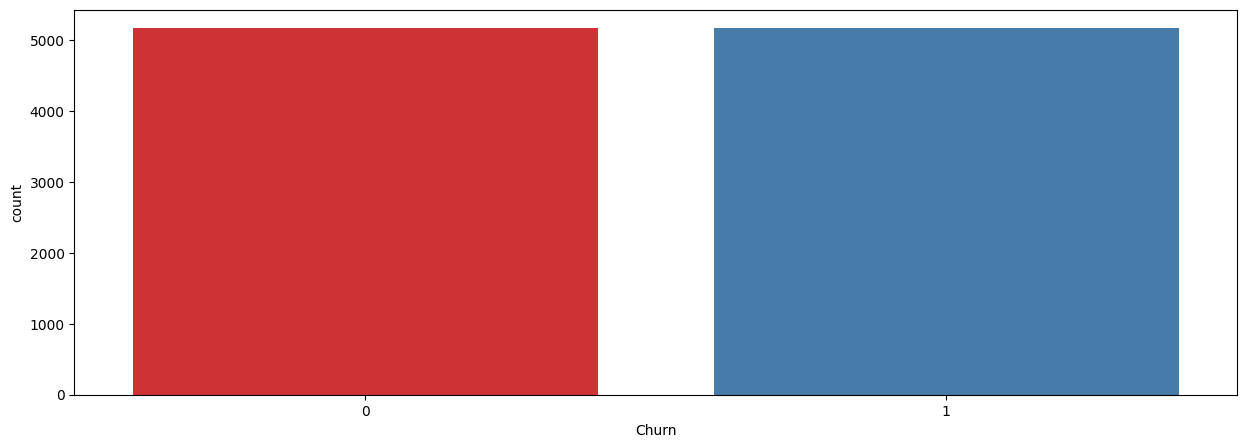

In [254]:
ax = sns.countplot(x=Y,palette = 'Set1')

**Commentaire**: Cette action de réechantillonnage a été réalisée après avoir constaté un overfitting sur certains modèles, surtout le RandomForest.

<span style="color:green"> Choix de la métrique de performance à maximiser par notre modèle </span>

Dans notre contexte de prédiction des résiliations de contracts, imaginons que les clients qui sont prédits positifs se voient proposer une réduction de tarif. On peut alors schématiquement envisager deux stratégies opposées:

*- Stratégie 1*  **“Ne pas perdre de clients”** : on veut détecter la majorité des clients en partance. Quitte à être peu précis et proposer des réductions de tarifs à des clients qui n’allaient pas partir. Si les décideurs décident d'adopter cette stratégie, alors la métrique à maximiser sera le recul qui représente le taux de vrais positifs (Churn) prédit par notre modèle.


*- Stratégie 2* **“Ne pas perdre de marges”** : on veut éviter de proposer des réductions de tarifs à des clients qui n’avaient pas l’intention de résilier, ce qui génère une perte de marges. On cherche donc à avoir un nombre de faux positifs faibles, ce qui coïncide avec une précision élevée, car on cherche à être précis sur les prédictions de résiliation. Si les décideurs décident d'adopter cette stratégie, alors la métrique à maximiser sera la précision qui représente le taux de personnes réellement positives (Churn) parmi les personnes prédites comme positives (Churn) par notre modèle.

Nous supposons pour la suite que la **stratégie 2** est celle qui est privilégiée par le métier. Notre métrique à maximiser sera donc la **Précision**.

# <span style="color:green"> Modélisation des données </span>



<span style="color:green"> Splitting des données en entraînement et tests. Nous utiliserons 80 % pour l'entraînement du modèle et 20 % pour le test </span>


In [255]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = seed)

<span style="color:green"> Construction d'un Pipeline de Machine Learning </span>


In [256]:
num_vars=train_X.select_dtypes(exclude=['object']).columns
num_vars

cat_vars=train_X.select_dtypes(exclude=['int64','float']).columns
cat_vars

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'OnlineSecurity', 'PaperlessBilling', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [257]:
def build_pipeline(algo_ml, impute_num = SimpleImputer(strategy="median"), impute_var=SimpleImputer(strategy="constant", fill_value="Unknown"), scaler = StandardScaler()):
  
  # Pipeline de transformation des variables numériques
  numeric_transformer = make_pipeline(
    (impute_num), 
    (scaler)
    )
  
  # Pipeline de transformation des variables catégorielles
  categorical_transformer = make_pipeline(
    (impute_var),
    (OneHotEncoder(handle_unknown="ignore"))
    )
  
  # Combinaison des 2 étapes en un seul objet
  preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ]
    )
  
  # Pipeline final de Machine Learning
  model = Pipeline(steps=[('preprocessing', preprocessor), 
                        ('regressor', algo_ml)])
  
  return model

<span style="color:green"> Définition, Exécution et Analyse des expériences avec MLflow. </span>





In [258]:
#pip install mlflow

In [280]:
mlflow.set_experiment("Nouveau_Baseline-Models-Bis")

Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\store\tracking\file_store.py", line 302, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\store\tracking\file_store.py", line 395, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1320, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\store\tracking\file_store.py", line 13

In [260]:
# Fonction de calcul des métriques de performances

def eval_metrics(actual, pred):
    # Calculer le rappel
    recall = recall_score(actual, pred)

    # Calculer la précision
    precision = precision_score(actual, pred)

    # Calculer l'exactitude
    accuracy = accuracy_score(actual, pred)

    # Calculer le F1-score
    #f1 = f1_score(actual, pred)

    # Calculer l'AUC
    auc = roc_auc_score(actual, pred)

    # Calculer la spécificité et la sensibilité
    #specificity = 1 - precision_score(actual, pred, pos_label=1)
    #sensitivity = recall_score(actual, pred, pos_label=1)
    
    return recall,precision,accuracy,auc


In [261]:
mlflow.sklearn.autolog() # Tracking automatique des modèles Sklearn

with mlflow.start_run(run_name = 'Logistic_Regression_default'):
  
  # Générer le pipeline modèle
  model = build_pipeline(algo_ml = LogisticRegression(random_state = seed, n_jobs = -1))

  # Entraîner le pipeline modèle
  model.fit(train_X, train_y)

  # Prédictions sur les données d'entraînement
  train_preds = model.predict(train_X)

  # Métriques de performances sur les données d'entraînement
  train_recall,train_precision,train_accuracy,train_auc = eval_metrics(train_y, train_preds)
  
  # Prédictions sur les données de test
  test_preds = model.predict(test_X)

  # Métriques de performances sur les données de validation
  test_recall,test_precision,test_accuracy,test_auc= eval_metrics(test_y, test_preds)

  mlflow.log_metric("train_recall_experience", train_recall)
  mlflow.log_metric("train_precision_experience", train_precision)
  mlflow.log_metric("train_accuracy_experience", train_accuracy)
  mlflow.log_metric("train_auc_experience", train_auc)

    
  mlflow.log_metric("test_recall_experience", test_recall)
  mlflow.log_metric("test_precision_experience", test_precision)
  mlflow.log_metric("test_accuracy_experience", test_accuracy)
  mlflow.log_metric("test_auc_experience", test_auc)

  
  # Sauvegarde du modèle
  mlflow.sklearn.log_model(model, "lr_run1")
  
  # optionnel : pour ne pas forcément avoir besoin de regarder l'interface graphique
  
  print("Accuracy on Train Data:", train_accuracy) 
  print("Recall on Train Data:", train_recall) 
  print("Precision on Train Data:", train_precision)  
  print("AUC on Train Data:", train_auc)  

  print("Accuracy on Test Data:", test_accuracy)  
  print("Recall on Test Data:", test_recall)  
  print("Precision on Test Data:", test_precision)  
  print("AUC on Test Data:", test_auc)  

  
  print("Model run ID: ", mlflow.active_run().info.run_uuid) 

mlflow.end_run()


Accuracy on Train Data: 0.7672143029717323
Recall on Train Data: 0.7918475639170285
Precision on Train Data: 0.7552334943639292
AUC on Train Data: 0.7671725718907504
Accuracy on Test Data: 0.7589371980676328
Recall on Test Data: 0.7607003891050583
Precision on Test Data: 0.7555555555555555
AUC on Test Data: 0.7589490429210513
Model run ID:  da1ff6cb8d8a47fd8a734705019da1dc


In [262]:
mlflow.sklearn.autolog() # Tracking automatique des modèles Sklearn

with mlflow.start_run(run_name = 'SVM_Classifier_default'):
  
  # Générer le pipeline modèle
  model = build_pipeline(algo_ml = SVC(random_state = seed))

  # Entraîner le pipeline modèle
  model.fit(train_X, train_y)

  # Prédictions sur les données d'entraînement
  train_preds = model.predict(train_X)

  # Métriques de performances sur les données d'entraînement
  train_recall,train_precision,train_accuracy,train_auc = eval_metrics(train_y, train_preds)
  
  # Prédictions sur les données de test
  test_preds = model.predict(test_X)

  # Métriques de performances sur les données de validation
  test_recall,test_precision,test_accuracy,test_auc = eval_metrics(test_y, test_preds)

  mlflow.log_metric("train_recall_experience", train_recall)
  mlflow.log_metric("train_precision_experience", train_precision)
  mlflow.log_metric("train_accuracy_experience", train_accuracy)
  mlflow.log_metric("train_auc_experience", train_auc)

  
  mlflow.log_metric("test_recall_experience", test_recall)
  mlflow.log_metric("test_precision_experience", test_precision)
  mlflow.log_metric("test_accuracy_experience", test_accuracy)
  mlflow.log_metric("test_auc_experience", test_auc)

  
  # Sauvegarde du modèle
  mlflow.sklearn.log_model(model, "svm_run1")
  
  # optionnel : pour ne pas forcément avoir besoin de regarder l'interface graphique
  
  print("Accuracy on Train Data:", train_accuracy) 
  print("Recall on Train Data:", train_recall) 
  print("Precision on Train Data:", train_precision)  
  print("AUC on Train Data:", train_auc)  

  print("Accuracy on Test Data:", test_accuracy)  
  print("Recall on Test Data:", test_recall)  
  print("Precision on Test Data:", test_precision)  
  print("AUC on Test Data:", test_auc)  
   
  print("Model run ID: ", mlflow.active_run().info.run_uuid) 

mlflow.end_run()


Accuracy on Train Data: 0.7829185793669968
Recall on Train Data: 0.8232030873130728
Precision on Train Data: 0.7623408532499442
AUC on Train Data: 0.7828503335887725
Accuracy on Test Data: 0.7671497584541063
Recall on Test Data: 0.7937743190661478
Precision on Test Data: 0.7513812154696132
AUC on Test Data: 0.7673286182662793
Model run ID:  355514799b3a46adae684dc62469aa34


In [263]:
mlflow.sklearn.autolog() # Tracking automatique des modèles Sklearn

with mlflow.start_run(run_name = 'RandomForest_Classifier_default'):
  
  # Générer le pipeline modèle
  model = build_pipeline(algo_ml = RandomForestClassifier(random_state = seed, n_jobs=-1 ))

  # Entraîner le pipeline modèle
  model.fit(train_X, train_y)

  # Prédictions sur les données d'entraînement
  train_preds = model.predict(train_X)

  # Métriques de performances sur les données d'entraînement
  train_recall,train_precision,train_accuracy,train_auc = eval_metrics(train_y, train_preds)
  
  # Prédictions sur les données de test
  test_preds = model.predict(test_X)

  # Métriques de performances sur les données de validation
  test_recall,test_precision,test_accuracy,test_auc = eval_metrics(test_y, test_preds)

  mlflow.log_metric("train_recall_experience", train_recall)
  mlflow.log_metric("train_precision_experience", train_precision)
  mlflow.log_metric("train_accuracy_experience", train_accuracy)
  mlflow.log_metric("train_auc_experience", train_auc)

  
  mlflow.log_metric("test_recall_experience", test_recall)
  mlflow.log_metric("test_precision_experience", test_precision)
  mlflow.log_metric("test_auc_experience", test_auc)
  
  # Sauvegarde du modèle
  mlflow.sklearn.log_model(model, "rf_run1")
  
  # optionnel : pour ne pas forcément avoir besoin de regarder l'interface graphique
  print("Accuracy on Train Data:", train_accuracy) 
  print("Recall on Train Data:", train_recall) 
  print("Precision on Train Data:", train_precision)  
  print("AUC on Train Data:", train_auc)  

  print("Accuracy on Test Data:", test_accuracy)  
  print("Recall on Test Data:", test_recall)  
  print("Precision on Test Data:", test_precision)  
  print("AUC on Test Data:", test_auc)  
  
  print("Model run ID: ", mlflow.active_run().info.run_uuid) 

mlflow.end_run()


Accuracy on Train Data: 0.9980671659821213
Recall on Train Data: 0.9990352146647371
Precision on Train Data: 0.9971112181030333
AUC on Train Data: 0.9980655260158149
Accuracy on Test Data: 0.8951690821256039
Recall on Test Data: 0.9513618677042801
Precision on Test Data: 0.8541484716157205
AUC on Test Data: 0.895546576846382
Model run ID:  98ce42bb32a2431bbc7a06137fa504cd


In [264]:
mlflow.sklearn.autolog() # Tracking automatique des modèles Sklearn

with mlflow.start_run(run_name = 'XGBoost_Classifier_default'):

  # Générer le pipeline modèle
  model = build_pipeline(algo_ml = XGBClassifier(random_state = seed, n_jobs=-1 ))

  # Entraîner le pipeline modèle
  model.fit(train_X, train_y)

  # Prédictions sur les données d'entraînement
  train_preds = model.predict(train_X)

  # Métriques de performances sur les données d'entraînement
  train_recall,train_precision,train_accuracy,train_auc = eval_metrics(train_y, train_preds)
  
  # Prédictions sur les données de test
  test_preds = model.predict(test_X)

  # Métriques de performances sur les données de validation
  test_recall,test_precision,test_accuracy,test_auc = eval_metrics(test_y, test_preds)

  mlflow.log_metric("train_recall_experience", train_recall)
  mlflow.log_metric("train_precision_experience", train_precision)
  mlflow.log_metric("train_accuracy_experience", train_accuracy)
  mlflow.log_metric("train_auc_experience", train_auc)

  mlflow.log_metric("test_recall_experience", test_recall)
  mlflow.log_metric("test_precision_experience", test_precision)
  mlflow.log_metric("test_auc_experience", test_auc)
  
  # Sauvegarde du modèle
  mlflow.sklearn.log_model(model, "xgb_run1")
  
  # optionnel : pour ne pas forcément avoir besoin de regarder l'interface graphique
  
  print("Accuracy on Train Data:", train_accuracy) 
  print("Recall on Train Data:", train_recall) 
  print("Precision on Train Data:", train_precision)  
  print("AUC on Train Data:", train_auc)  

  print("Accuracy on Test Data:", test_accuracy)  
  print("Recall on Test Data:", test_recall)  
  print("Precision on Test Data:", test_precision) 
  print("AUC on Test Data:", test_auc)  
 
  print("Model run ID: ", mlflow.active_run().info.run_uuid) 

mlflow.end_run()


Accuracy on Train Data: 0.9363372795361198
Recall on Train Data: 0.9744331886155331
Precision on Train Data: 0.9056265411342749
AUC on Train Data: 0.9362727414520067
Accuracy on Test Data: 0.8647342995169082
Recall on Test Data: 0.9182879377431906
Precision on Test Data: 0.8280701754385965
AUC on Test Data: 0.8650940648408851
Model run ID:  4cf3564d4f8e44a59c2dc0a3196b0fb9


**Remarques:** Le modèle RandomForest offre la précision la plus élevée (0.8541). Nous allons récupérer le fichier pickle de ce modèle pour le déployer via une application web Streamlit.

Pour obtenir l'interface graphique de Mlflow, vous devez lancer anaconda Prompt, se placer dans le répertoire courant et lancer le code : 

mlflow ui

Le serveur de Mlflow se lancera sur le localhost.